In [18]:
import os # os: Operating system interactions (file and directory manipulation).
import os.path as op # op: Alias for os.path, used for path-related operations.
import shutil # shutil: High-level file operations (copy, move, delete).
from glob import glob # glob: File and directory name pattern matching.
from pathlib import Path # pathlib.Path: Object-oriented file system path representation.
from tqdm.auto import tqdm # tqdm: Progress bars for tracking task completion.
from sklearn.model_selection import train_test_split
from PIL import  Image

In [6]:
directory = "data/"
paths = glob(op.join(directory, "thai-handwritten-dataset", "*", "*")) # all folder, all file in folder

In [12]:
# TODO: use Counter from collection to count the number, use Pathlib to get the parent folder name
from collections import Counter
Counter([Path(p).parent.name for p in paths])

Counter({'0': 175,
         '1': 175,
         '2': 175,
         '3': 175,
         '4': 175,
         '5': 175,
         '6': 175,
         '7': 175,
         '8': 175,
         '9': 175})

2


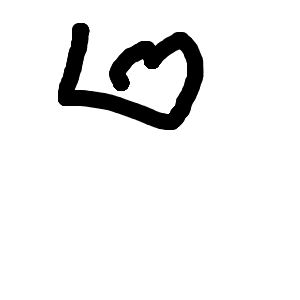

In [19]:
# TODO: Use Pillow's Image to read and open one file
idx = 400
print(Path(paths[idx]).parent.name)
Image.open(paths[idx])

In [21]:
# TODO: Use train_test_split to split image into 90% training and 10% validation
train_paths, validation_paths = train_test_split(paths, test_size=0.1, random_state=42)
len(train_paths), len(validation_paths)

(1575, 175)

In [22]:
# Create directory
for i in range(10):
    os.makedirs(f"data/train/{i}", exist_ok=True)
    os.makedirs(f"data/validation/{i}",exist_ok=True)

In [23]:
def copy_to_destination(src_paths, dst_path):
    """
    Copy list of src_paths to destination path (dst_path)
    """
    for path in tqdm(src_paths):
        path = Path(path)
        parent_dir = path.parent.name
        shutil.copy(path, op.join(dst_path, parent_dir, path.name))

In [24]:
copy_to_destination(train_paths, "data/train/")
copy_to_destination(validation_paths, "data/validation/")

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

In [25]:
len(glob("data/train/*/*")), len(glob("data/validation/*/*"))

(1575, 175)

In [28]:
import torchgen
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [29]:
# Create image transforms ; resize, convert to grey scale, normalize tensor

resize_transforms = transforms.Resize((28,28))
grey_scale_transform = transforms.Grayscale()
tensor_transforms = transforms.ToTensor()

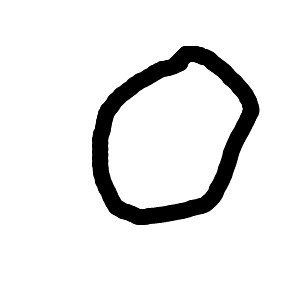

In [31]:
img = Image.open(paths[100])
img

In [32]:
resize_transforms(img)

In [33]:
grey_scale_transform(resize_transforms(img))

In [35]:
img_tensor = tensor_transforms(grey_scale_transform(resize_transforms(img)))
img_tensor.shape

torch.Size([1, 28, 28])

In [45]:
1 - img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0196, 0.0157, 0.0000, 0.0000, 0.0000,

In [39]:
transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.Grayscale(),
        transforms.ToTensor()
    ])

<function matplotlib.pyplot.show(close=None, block=None)>

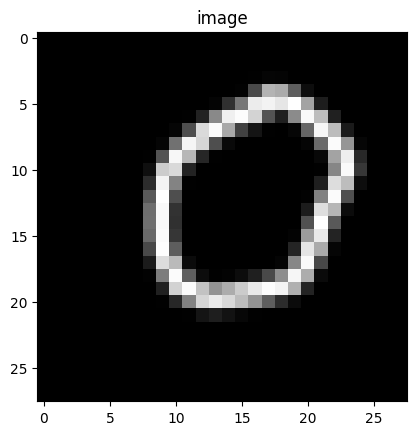

In [41]:
img_t = 1 - transform(img).squeeze(0)
plt.imshow(img_t, cmap="grey")
plt.title("image")
plt.show

## Create custom dataset


In [53]:
class ThaiDigitDataset(Dataset):
    def __init__(self, img_dir: str, transform=None):
        # TODO: Input img_dir, create a relatioship between image path and label
        self.img_dir = img_dir
        self.transform = transform
        self.img_lables = [ (p, Path(p).parent.name) for p in glob(op.join(img_dir,"*","*")) ]

    def __len__(self):
        # TODO: Find length of the dataset
        return len(self.img_lables)

    def __getitem__(self, idx):
        # TODO:
        image_path, label = self.img_lables[idx]
        label = int(label)
        image = Image.open(image_path)
        if self.transform is not None:
            image = 1 - self.transform(image)
        return image, label

In [54]:
train_thaidigitdataset = ThaiDigitDataset("data/train/",transform=transform)
validation_thaidigitdataset = ThaiDigitDataset("data/validation/",transform=transform)

In [55]:
train_thaidigitdataset[10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## Create Data Loader


In [56]:
# TODO: Create Data Loader
train_loader = DataLoader(train_thaidigitdataset, batch_size=16, shuffle=True) # no need to order data to train
validation_loader = DataLoader(validation_thaidigitdataset, batch_size=16, shuffle=False) # need to order data to validate

In [58]:
images, labels = next(iter(train_loader)) # load an example batch

In [59]:
images.shape, labels.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

## Create Model


In [61]:
images.view(-1,28*28).shape

torch.Size([16, 784])

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ThaiDigitNet(nn.Module):
    def __init__(self):
        super(ThaiDigitNet, self).__init__()
        # TODO: Create Linear (Dense) Neural Network
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
    
    def forward(self, x):
        # TODO: Write a forward pass
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [63]:
# TODO: Try passing an input to the midel
net = ThaiDigitNet()

In [65]:
prediction = net(images)
prediction.shape

torch.Size([16, 10])

In [66]:
prediction.argmax(dim=1)

tensor([6, 4, 3, 3, 7, 7, 3, 7, 7, 4, 4, 3, 7, 7, 3, 3])

In [67]:
labels

tensor([3, 7, 5, 1, 3, 5, 4, 6, 1, 6, 0, 9, 3, 7, 8, 4])

## Train Model


**Note for loss function**

- `CrossEntropyLoss` computes the cross entropy loss between logits and target. So we don't need to apply softmax to the output of the model.
- This is equivalent to the combination of applying `LogSoftmax` at the last layer and use `NLLLoss` as a loss function.


In [73]:
# TODO: Create cross entropy loss function, SGD (strocastic gradient descent) optimizer, and its learning rate
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # for update model parameter

In [76]:
# TODO: Single pass model and calculate loss

# train 1 epoch
for i, (images, labels) in enumerate(train_loader):
    pred = net(images)
    loss = loss_fn(pred, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # update model param

In [78]:
i

98

In [77]:
loss

tensor(2.2900, grad_fn=<NllLossBackward0>)

### Training Loop


In [79]:
n_epochs = 50
update_step = 50

for epoch in range(n_epochs):
    # TODO: Write a training loop
    # TODO: Print the train loss every 100 steps
    net.train() # model is in the train mode 
    for batch_idx, (images, labels) in enumerate(train_loader):
        pred = net(images)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # update model param

        if batch_idx % update_step == 0:
            print(f"Loss: {loss.item()}, Epoch: {epoch}, # {batch_idx * len(images)}")

    # TODO: Write a validation loop
    # TODO: Print the validation loss and accuracy every epoch
    net.eval()
    val_loss, correct = 0, 0
    n_val = len(validation_loader.dataset)
    for images, labels in validation_loader:
        pred = net(images)
        val_loss += loss_fn(pred, labels).item()
        correct += (pred.argmax(dim=1) == labels).float().sum().item()
    print(f"Validation Loss: {val_loss / n_val}, Validation Accuracy: {correct / n_val}")
    

Loss: 2.270350456237793, Epoch: 0, # 0
Loss: 2.2357983589172363, Epoch: 0, # 800
Validation Loss: 0.14141227722167968, Validation Accuracy: 0.2857142857142857
Loss: 2.2371108531951904, Epoch: 1, # 0
Loss: 2.1985414028167725, Epoch: 1, # 800
Validation Loss: 0.1383900111062186, Validation Accuracy: 0.3657142857142857
Loss: 2.180824041366577, Epoch: 2, # 0
Loss: 2.1912033557891846, Epoch: 2, # 800
Validation Loss: 0.1345074415206909, Validation Accuracy: 0.3485714285714286
Loss: 2.230699300765991, Epoch: 3, # 0
Loss: 2.1672799587249756, Epoch: 3, # 800
Validation Loss: 0.1298505619594029, Validation Accuracy: 0.38857142857142857
Loss: 2.004668951034546, Epoch: 4, # 0
Loss: 2.019824743270874, Epoch: 4, # 800
Validation Loss: 0.12463378429412841, Validation Accuracy: 0.4514285714285714
Loss: 1.9214895963668823, Epoch: 5, # 0
Loss: 1.9820616245269775, Epoch: 5, # 800
Validation Loss: 0.11864741597856794, Validation Accuracy: 0.4857142857142857
Loss: 1.8896161317825317, Epoch: 6, # 0
Loss: 1

## Save the model


In [80]:
net.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0188,  0.0093,  0.0140,  ...,  0.0164, -0.0038,  0.0070],
                      [-0.0301,  0.0213,  0.0170,  ...,  0.0177, -0.0325,  0.0177],
                      [-0.0363,  0.0196,  0.0132,  ...,  0.0142,  0.0150,  0.0286],
                      ...,
                      [ 0.0106, -0.0221, -0.0093,  ..., -0.0149,  0.0319,  0.0210],
                      [ 0.0363, -0.0183,  0.0356,  ..., -0.0114,  0.0102, -0.0157],
                      [ 0.0119,  0.0261, -0.0208,  ...,  0.0239, -0.0036,  0.0217]])),
             ('fc1.bias',
              tensor([ 0.0082, -0.0648,  0.0240,  0.0188,  0.1412,  0.0576, -0.0121, -0.1077,
                      -0.1481, -0.1177,  0.0329, -0.0842, -0.0350,  0.1689,  0.0671,  0.0612,
                      -0.1061,  0.1787, -0.0676,  0.0096,  0.1791, -0.0417, -0.3452,  0.0884,
                       0.0134, -0.0555, -0.1431, -0.0252, -0.0748, -0.0007, -0.0182, -0.0236,
                      -0.2102, -0.03

In [81]:
net.state_dict()["fc1.weight"].shape, net.state_dict()["fc1.bias"].shape

(torch.Size([100, 784]), torch.Size([100]))

In [84]:
save_path = "model/thai_digit_pth"
torch.save(net.state_dict(), save_path)

## Load trained model and predict on a sample image


In [88]:
model = ThaiDigitNet() # define model 
model.load_state_dict(torch.load("model/thai_digit_pth")) # load saved model param

<All keys matched successfully>

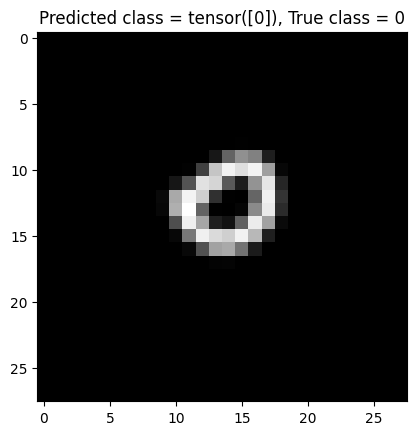

In [90]:
from glob import glob

sample_path = glob("data/thai-handwritten-dataset/*/*.png")[50]
img = Image.open(sample_path)
y_true = Path(sample_path).parent.name

img = 1 - transform(img)
y_pred = model(img)
y_pred = y_pred.argmax(dim=1)

plt.title("Predicted class = {}, True class = {}".format(y_pred, y_true))
plt.imshow(img.squeeze(0), cmap="gray")
plt.show()